# Simple NLS to test split step # 

Minimal code for a split step integration of the nonlinear schrodinger equation: 
$$ i \partial_{\eta} \psi  =  \partial_{\tau \tau}  \psi  + 2|\psi|^2 \psi $$

This has a statonary solution of the form:
$\psi = sech(\tau)$  

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.constants import pi 
from scipy.fftpack import fft, ifft, ifftshift, fftfreq  

%matplotlib inline


def runk4(A_0, eta,  step):
    
    k1 = step * nonlinear(A_0, eta)
    k2 = step * nonlinear(A_0 + .5 * k1, eta + .5 * step)
    k3 = step * nonlinear(A_0 + .5 * k2, eta + .5 * step)
    k4 = step * nonlinear(A_0 + k3, eta + step)
    
    return A_0 + (k1 + 2.*k2 + 2.*k3 + k4) / 6.  




def integrate(h, D, steps, A_0):
    
    nt = np.size(A_0)
    A_out = np.empty([nt, steps], dtype = complex)
    A = A_0
    eta = 0.
    for i in range(steps): 
      
        #do the linear step
        A = ifft( np.exp(-1j * D * h) * fft(A))
        
        # do the nonlinear step 
        A = runk4(A, eta, h)
        A_out[:,i] = A
        eta = eta + h
        
    return A_out, np.array(range(steps)) * h


def nonlinear(A, eta):
    
    dA = -2j *  A * abs(A)**2 
    
    return dA


/home/pbm24/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


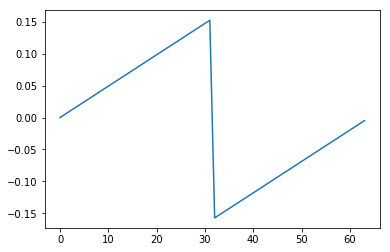

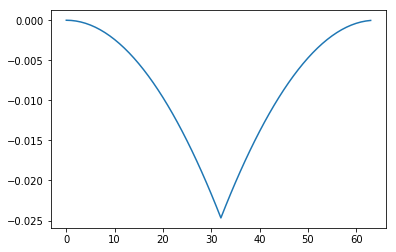

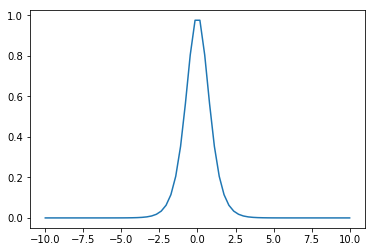

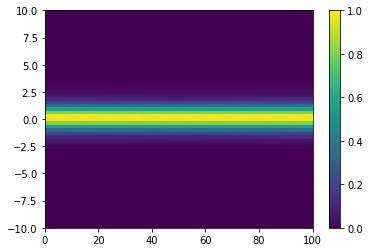

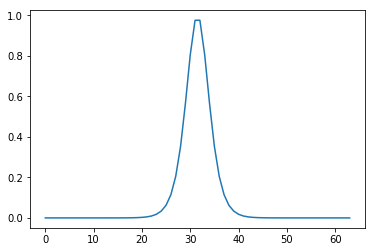

In [52]:
nt = 2**6
T = np.linspace(-10, 10, nt) 

gvd = -1.
freq = fftfreq(nt) * 2.*pi / (np.max(T) - np.min(T))
D = gvd * freq**2
A0 = 1. / np.cosh(T)**2

plt.figure()
plt.plot( D)

plt.figure()
plt.plot(T, A0)



#A0 = 0.1 * np.random.rand(nt)
A_out, z = integrate(0.01, D,10000, A0)
plt.figure()
plt.pcolormesh(z,T, abs(A_out))
plt.clim([0,1])
plt.colorbar()


plt.figure()
#plt.plot(A0)
plt.plot(ifft(fft(A0)))



